In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def createRangeList(start, end):
    return np.arange(start, end+1, 1)

def getEmptyCells(data_frame,column_name):
    nans = pd.isna(data_frame[column_name])
    nan_indices = []
    index_counter = 0
    for nan in nans:
        if nan == True:
            nan_indices.append(index_counter)
        index_counter = index_counter + 1
    return nan_indices

def weekly_sales_chart(scan_code,mean,week_frame,item_dict):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    description = week_frame.loc[week_frame['Scan Code'] == scan_code]['Description'].unique()[0]
    week =  [tuple[0] for tuple in item_dict[scan_code]]
    qty = np.array([tuple[1] for tuple in item_dict[scan_code]])
    total_sold = qty.sum()
    ax.set_title("Weekly Sales Chart: " + description)
    ax.bar(week,qty)
    plt.show()
def weekly_sales_mean_chart(item_mean_list):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    #description = week_frame.loc[week_frame['Scan Code'] == scan_code]['Description'].unique()[0]
    item =  [tuple[0] for tuple in item_mean_list]
    mean = np.array([tuple[1] for tuple in item_mean_list])
    ax.set_title("Weekly Mean of Sold Quantity of Every Item")
    plt.xlabel('Week')
    plt.ylabel('Weekly Sales Mean')
    #total_sold = qty.sum()
    #ax.set_title("Scan Code: " + str(scan_code)+ "  Description: " + description + "Sold : "+ str(total_sold))
    ax.bar(item,mean)
    plt.show()
def price_qty_chart(scan_code,week_frame,item_dict):
    
    description = week_frame.loc[week_frame['Scan Code'] == scan_code]['Description'].unique()[0]
    price =  [tuple[2] for tuple in item_dict[scan_code]]
    qty = np.array([tuple[1] for tuple in item_dict[scan_code]])
    plt.scatter(price, qty, label= "stars", color= "m",  
            marker= "*", s=30) 
    plt.xlabel('Price')
    plt.ylabel('Quantity Sold Per Week') 
    
    plt.legend() 
    plt.show()
def compare_weekly_sales(scan_code1,scan_code2,week_frame,item_dict):
#     data = [[30, 25, 50, 20],
#     [40, 23, 51, 17],
#     [35, 22, 45, 19]]
    prod_1 = list(int(tuple[1]) for tuple in item_dict[scan_code1])
    reduced_prod_1 = prod_1[:15]
    prod_2 = list(int(tuple[1]) for tuple in item_dict[scan_code2])
    reduced_prod_2 = prod_2[:15]
    width = 0.25
    r = np.arange(52)
    plt.bar(r, reduced_prod_1, color = 'b',
        width = width, edgecolor = 'black',
        label='Item1')
    plt.bar(r + width, reduced_prod_2, color = 'g',
        width = width, edgecolor = 'black',
        label='Item2')
    plt.xlabel("Week")
    plt.ylabel("Total Sales Per Week")
    plt.title("VS")
    plt.xticks(r + width/2,['1','2','3','4'])
    plt.legend()
    plt.show()
def test():
       
    Women = [115, 215, 250, 200]
    Men = [1, 3, 4, 2]

    n=4
    r = np.arange(n)
    width = 0.25


    plt.bar(r, Women, color = 'b',
            width = width, edgecolor = 'black',
            label='Women')
    plt.bar(r + width, Men, color = 'g',
            width = width, edgecolor = 'black',
            label='Men')

    plt.xlabel("Year")
    plt.ylabel("Number of people voted")
    plt.title("Number of people voted in each year")

    # plt.grid(linestyle='--')
    plt.xticks(r + width/2,['2018','2019','2020','2021'])
    plt.legend()

    plt.show()


In [86]:
#the file contains transactional record starting 01/01/2022 to 29/12/2022
df = pd.read_csv('Sale-Items.csv',dtype={'Scan Code':str})

#remove all unidentified items except for gas and lotto online
nan_scan_code = getEmptyCells(df,'Scan Code')
for i in nan_scan_code:
    #print(df['Description'][i])
    if df['Department'][i] == 'GAS PUMP #1' or df['Department'][i] == 'GAS PUMP #2' or df['Department'][i] == 'GAS PUMP #3' or df['Department'][i] == 'GAS PUMP #4':
        df.loc[df.index[i], 'Scan Code'] = '2235'
    elif df['Department'][i] == 'LOTTO ONLINE':
        df.loc[df.index[i], 'Scan Code'] = '2236'

print("Before removing nan scan codes : ",df.shape)
nan_scan_code = getEmptyCells(df,'Scan Code')

#drop NaN values
df.drop(index=nan_scan_code,axis=0,inplace=True)
print("After removing NaN scan codes : ",df.shape)
df.drop(columns=['Register','Unnamed: 14'],inplace=True)
df.to_csv('demand_forecast.csv',index=False,index_label=False)


Int64Index([ 19797,  21887,  36899,  40840,  41013,  53048,  54600,  61747,
             65317,  69734,
            ...
            468348, 469883, 469985, 472534, 472544, 477456, 479179, 479222,
            479600, 479616],
           dtype='int64', length=116)
Before removing nan scan codes :  (480070, 15)
After removing NaN scan codes :  (452372, 15)


In [94]:
df = pd.read_csv('demand_forecast.csv',low_memory=False)
#remove items with POS Cost 0, except for Gas and Lotto Online, this is an outlier. Cost for an item is never zero
zero_cost = df[df['POS Cost'] == 0].index
for i in zero_cost:
    if df['Department'][i] == 'GAS PUMP #1' or df['Department'][i] == 'GAS PUMP #2' or df['Department'][i] == 'GAS PUMP #3' or df['Department'][i] == 'GAS PUMP #4':
        df.loc[df.index[i], 'POS Cost'] = df['POS Retail'][i] -  (0.2 * df['POS Retail'][i]) # mean profit is 20%. Consulted with owner. Mean used because actual gas price were not recorded by the owner
    elif df['Department'][i] == 'LOTTO ONLINE' or df['Department'][i] == 'LOTTO SCRATCH OFF':
        df.loc[df.index[i], 'POS Cost'] = df['POS Retail'][i] -  (0.05 * df['POS Retail'][i]) 
        
zero_cost = df[df['POS Cost'] == 0].index
df.drop(index=zero_cost,axis=0,inplace=True)
print("After removing numm zero costs : ",df.shape)
#convert to Date column to proper date format
df['Date'] = pd.to_datetime(df['Date'])

# group weekly [pd.Grouper(key='Date', freq='W'),
# df['Week Number'] = df['Date'].dt.week

#Find total number of sale quantity of each item per week, mean of Cost and Retail
grp = df.groupby([pd.Grouper(key="Date", freq="7D",origin='2022-01-01'),'Scan Code','Description','Department']).agg({'Qty':'sum','POS Cost':'mean','POS Retail':'mean'})
week_grp_lbl = grp.reset_index()

week_grp_lbl.to_csv('demand_forecast_weekly.csv',index=False,index_label=False)
week_grp_lbl

After removing numm zero costs :  (449036, 13)


,Date,Scan Code,Description,Department,Qty,POS Cost,POS Retail
0,2022-01-01,008437625001,Black T Shirt,Miscs,13.0,9.99,9.990000
1,2022-01-01,008660000026,ZIG-ZAG PAPERS- 1 1/4,Cigar,1.0,1.50,2.790000
2,2022-01-01,008660000156,zigzag cone king,NOVELTY,4.0,1.03,1.990000
3,2022-01-01,008660000187,Zogzag Cone 11/4 A,NOVELTY,6.0,1.16,2.490000
4,2022-01-01,0105,Pink Bong,NOVELTY,1.0,14.50,34.990000
...,...,...,...,...,...,...,...
79183,2022-12-31,887725000429,electrolit passion fruit,SODA,1.0,2.00,3.490000
79184,2022-12-31,894135001175,GOOD STUFF P/TOB FULL FLA,TOBACCO,1.0,11.99,16.990000
79185,2022-12-31,895216001060,FOUR LOCO PEACH 24OZ CAN,BEER,4.0,2.53,3.463333
79186,2022-12-31,9097202112052,Cannabeast Doobie Cookies,CBD,1.0,6.00,15.990000


In [112]:
#Exporatory Data analysis (MEAN,MEDIAN,STANDARD DEVIATION) for each item each week.
#item wise weekly report

item_dict = {}

for item in week_grp_lbl['Scan Code']:
   item_dict[item] = [(week, quantity,retail) for week, quantity, retail in week_grp_lbl.loc[week_grp_lbl['Scan Code'] == item, ['Date','Qty','POS Retail']].values]
#unique items list
items_list = week_grp_lbl['Scan Code'].unique()

#departments table
#dep_table = week_grp_lbl.groupby(['Scan Code','Department'])


item_analysis_list = [] #collect item's weekly sale quantity's mean
for item in items_list:
#     week =  [tuple[0] for tuple in item_dict[item]]
    qty_sold_per_week = np.array([tuple[1] for tuple in item_dict[item]])
    mean = qty_sold_per_week.mean()#items total sales mean for a week
    variance = qty_sold_per_week.var()
    std_deviation = np.sqrt(variance)
    item_analysis_list.append((item,mean,variance,std_deviation))

sorted_list = sorted(item_mean_list, key=lambda x: x[1], reverse = True)



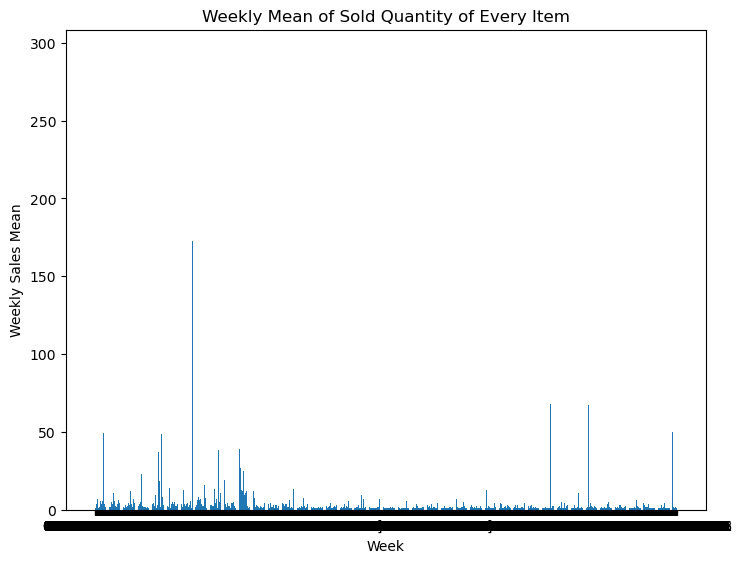

In [166]:
weekly_sales_mean_chart(item_mean_list)                                  

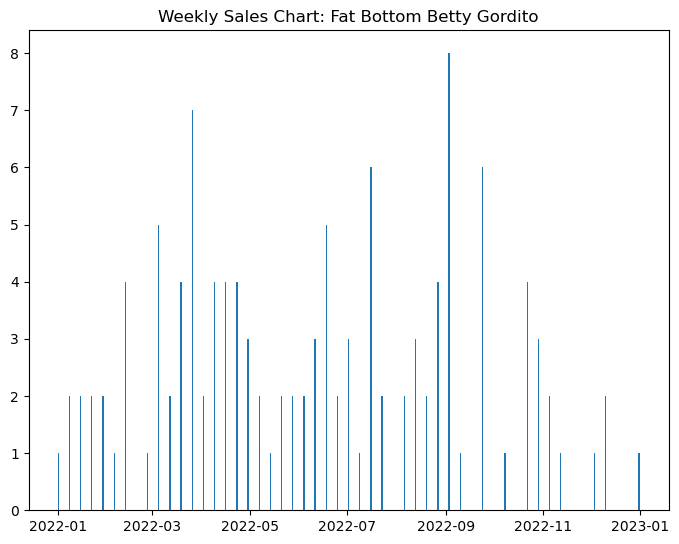

In [167]:
weekly_sales_chart('818578014127',12,week_grp_lbl,item_dict)# popular cigar

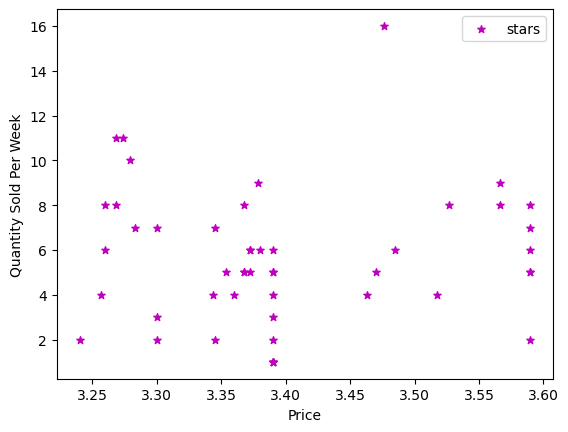

In [171]:
price_qty_chart('895216001060',week_grp_lbl,item_dict)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

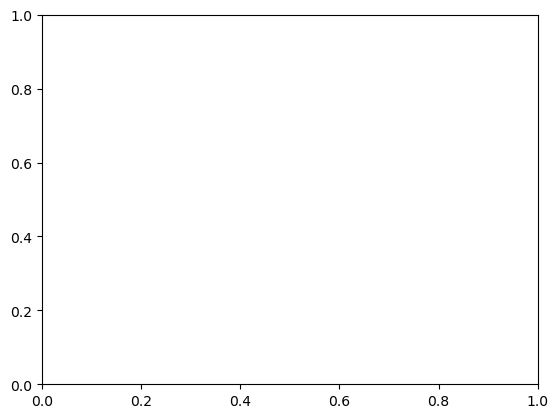

In [172]:
compare_weekly_sales('818578011966','818578014127',week_grp_lbl,item_dict)

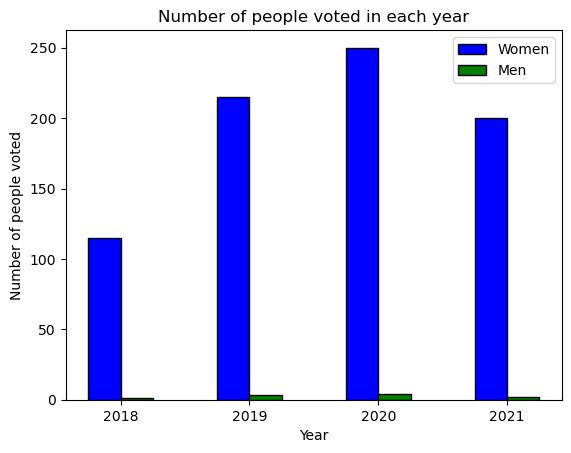

In [143]:
test()